In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download S&P500 data with maximum available history
ticker = "SPY"
data = yf.download(ticker, period="max", interval="1d")

# Filter data from specific window
window_frame = "2000-01-01"
end_of_window = "2023-12-31"
data = data[(data.index >= window_frame) & (data.index <= end_of_window)]
data['TICKER'] = ticker

data.reset_index(inplace=True)
data = data.rename(columns={'Date': 'FIRST_OPEN_DATE', 'Open': 'OPEN', 'High': 'HIGH', 'Low': 'LOW', 'Close': 'CLOSE'})

data.tail(25)


[*********************100%***********************]  1 of 1 completed
C:\Users\a-niv\AppData\Local\Temp\ipykernel_14180\741468726.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TICKER'] = ticker


FIRST_OPEN_DATE        OPEN        HIGH         LOW       CLOSE  \
6012      2023-11-24  455.070007  455.500000  454.730011  455.299988   
6013      2023-11-27  454.649994  455.489990  454.079987  454.480011   
6014      2023-11-28  454.079987  456.269989  453.500000  454.929993   
6015      2023-11-29  457.149994  458.320007  454.200012  454.609985   
6016      2023-11-30  455.480011  456.760010  453.339996  456.399994   
6017      2023-12-01  455.769989  459.649994  455.160004  459.100006   
6018      2023-12-04  455.600006  459.119995  454.339996  456.690002   
6019      2023-12-05  455.260010  457.589996  454.869995  456.600006   
6020      2023-12-06  458.809998  458.839996  454.309998  454.760010   
6021      2023-12-07  456.910004  458.899994  456.290009  458.230011   
6022      2023-12-08  457.459991  460.750000  457.209991  460.200012   
6023      2023-12-11  459.690002  462.170013  459.470001  461.989990   
6024      2023-12-12  461.630005  464.200012  460.600006  464.100006   
6025      2023-12-13  464.489990  470.760010  464.119995  470.500000   
6026      2023-12-14  472.500000  473.730011  469.250000  472.010010   
6027      2023-12-15  469.489990  470.700012  467.429993  469.329987   
6028      2023-12-18  470.980011  472.980011  469.890015  471.970001   
6029      2023-12-19  472.529999  474.920013  472.450012  474.839996   
6030      2023-12-20  473.959991  475.899994  467.820007  468.260010   
6031      2023-12-21  471.329987  472.980011  468.839996  472.700012   
6032      2023-12-22  473.859985  475.380005  471.700012  473.649994   
6033      2023-12-26  474.070007  476.579987  473.989990  475.649994   
6034      2023-12-27  475.440002  476.660004  474.890015  476.510010   
6035      2023-12-28  476.880005  477.549988  476.260010  476.690002   
6036      2023-12-29  476.489990  477.029999  473.299988  475.309998   

       Adj Close     Volume TICKER  
6012  449.225342   29737400    SPY  
6013  448.416260   50506000    SPY  
6014  448.860291   62115000    SPY  
6015  448.544495   63146000    SPY  
6016  450.310638   79752700    SPY  
6017  452.974640   89097900    SPY  
6018  450.596771   72430900    SPY  
6019  450.507996   69793500    SPY  
6020  448.692535   69124700    SPY  
6021  452.116241   66995400    SPY  
6022  454.059937   83080900    SPY  
6023  455.826080   65002200    SPY  
6024  457.907928   68327600    SPY  
6025  464.222534   93278000    SPY  
6026  465.712402  119026000    SPY  
6027  464.945587  141319300    SPY  
6028  467.560944   70375300    SPY  
6029  470.404114   55761800    SPY  
6030  463.885620  102921000    SPY  
6031  468.284119   86667500    SPY  
6032  469.225250   67126600    SPY  
6033  471.206573   55387000    SPY  
6034  472.058563   68000300    SPY  
6035  472.236877   77158100    SPY  
6036  470.869751  122234100    SPY

In [2]:
# Ensure 'FIRST_OPEN_DATE' is in datetime format
data['FIRST_OPEN_DATE'] = pd.to_datetime(data['FIRST_OPEN_DATE'])

# Sort dates to facilitate finding the next trading day
data_sorted = data['FIRST_OPEN_DATE'].sort_values().unique()

# Function to find the first trading day of a given month
def find_first_trading_day_for_month(year, month):
    start_date = pd.Timestamp(f'{year}-{month:02d}-01')
    relevant_dates = data_sorted[(data_sorted >= start_date) & (data_sorted.month == month)]
    
    if relevant_dates.size == 0:
        return None
    
    return relevant_dates[0]

def assign_trading_day(year, month, day):
    try:
        requested_date = pd.Timestamp(f'{year}-{month:02d}-{day:02d}')
        
        if requested_date in data_sorted:
            return requested_date
        else:
            next_trading_day = find_first_trading_day_for_month(year, month)
            relevant_dates = data_sorted[(data_sorted > requested_date) & (data_sorted.month == month)]
            
            if relevant_dates.size == 0:
                next_month = month + 1
                next_year = year
                if next_month > 12:
                    next_month = 1
                    next_year += 1
                
                return find_first_trading_day_for_month(next_year, next_month)
            return relevant_dates[0]
    except ValueError:
        next_month = month + 1
        next_year = year
        if next_month > 12:
            next_month = 1
            next_year += 1
        
        return find_first_trading_day_for_month(next_year, next_month)

# List of months and days to process
months = list(range(1, 13))  # From 1 to 12
days = list(range(1, 32))    # From 1 to 31

# Create an empty DataFrame to store the results
results = []

# For each month and day, assign the first trading day
for year in range(2010, 2024):
    for month in months:
        for day in days:
            matching_date = assign_trading_day(year, month, day)
            month_str = f'{year}-{month:02d}'
            results.append({'CHOSEN_DAY': day, 'FIRST_OPEN_DATE': matching_date, 'MONTH': month_str})

# Create the DataFrame with results
result_df = pd.DataFrame(results)

normalized_data = pd.merge(result_df, data, on='FIRST_OPEN_DATE')
normalized_data = normalized_data.sort_values(by=['CHOSEN_DAY', 'MONTH'])
normalized_data['DAY'] = normalized_data['FIRST_OPEN_DATE'].dt.day
normalized_data = normalized_data.sort_values(by=['CHOSEN_DAY','FIRST_OPEN_DATE'])
normalized_data.tail(30)


CHOSEN_DAY FIRST_OPEN_DATE    MONTH        OPEN        HIGH         LOW  \
4370          31      2021-10-01  2021-09  430.980011  436.029999  427.230011   
4432          31      2021-12-01  2021-11  461.640015  464.670013  450.290009   
4463          31      2021-12-31  2021-12  475.640015  476.859985  474.670013   
4122          31      2022-01-03  2021-01  476.299988  477.850006  473.850006   
4494          31      2022-01-31  2022-01  441.239990  450.279999  439.809998   
4525          31      2022-03-01  2022-02  435.040009  437.170013  427.109985   
4556          31      2022-03-31  2022-03  457.890015  458.760010  451.160004   
4246          31      2022-05-02  2021-05  412.070007  415.920013  405.019989   
4587          31      2022-05-02  2022-04  412.070007  415.920013  405.019989   
4618          31      2022-05-31  2022-05  413.549988  416.459991  410.029999   
4308          31      2022-07-01  2021-07  376.559998  381.700012  373.799988   
4649          31      2022-07-01  2022-06  376.559998  381.700012  373.799988   
4711          31      2022-08-31  2022-08  399.929993  401.239990  395.040009   
4401          31      2022-10-03  2021-10  361.079987  368.549988  359.209991   
4742          31      2022-10-03  2022-09  361.079987  368.549988  359.209991   
4773          31      2022-10-31  2022-10  386.440002  388.399994  385.260010   
4804          31      2022-12-01  2022-11  408.769989  410.000000  404.750000   
4866          31      2023-01-31  2023-01  401.130005  406.529999  400.769989   
4897          31      2023-03-01  2023-02  395.410004  396.690002  393.380005   
4928          31      2023-03-31  2023-03  404.660004  409.700012  404.549988   
4959          31      2023-05-01  2023-04  415.470001  417.619995  415.269989   
4990          31      2023-05-31  2023-05  418.279999  419.220001  416.220001   
4680          31      2023-07-03  2022-07  442.920013  444.079987  442.630005   
5021          31      2023-07-03  2023-06  442.920013  444.079987  442.630005   
5052          31      2023-07-31  2023-07  457.410004  458.160004  456.049988   
5083          31      2023-08-31  2023-08  451.649994  452.829987  450.160004   
5114          31      2023-10-02  2023-09  426.619995  428.600006  424.459991   
5145          31      2023-10-31  2023-10  416.179993  418.529999  414.209991   
4835          31      2023-12-01  2022-12  455.769989  459.649994  455.160004   
5176          31      2023-12-01  2023-11  455.769989  459.649994  455.160004   

           CLOSE   Adj Close     Volume TICKER  DAY  
4370  434.239990  415.518494  129240100    SPY    1  
4432  450.500000  431.077454  131939200    SPY    1  
4463  474.959991  456.079681   65237400    SPY   31  
4122  477.709991  458.720306   72668200    SPY    3  
4494  449.910004  432.025391  152251400    SPY   31  
4525  429.980011  412.887695  137785900    SPY    1  
4556  451.640015  435.033966  121699900    SPY   31  
4246  414.480011  399.240265  158312500    SPY    2  
4587  414.480011  399.240265  158312500    SPY    2  
4618  412.929993  397.747253   95937000    SPY   31  
4308  381.239990  368.808716   74839700    SPY    1  
4649  381.239990  368.808716   74839700    SPY    1  
4711  395.179993  382.294189   76029700    SPY   31  
4401  366.609985  356.112610   89756500    SPY    3  
4742  366.609985  356.112610   89756500    SPY    3  
4773  386.209991  375.151428   96631300    SPY   31  
4804  407.380005  395.715240   76398200    SPY    1  
4866  406.480011  396.654144   86811800    SPY   31  
4897  394.739990  385.197937   99706800    SPY    1  
4928  409.390015  401.018463  112062600    SPY   31  
4959  415.510010  407.013306   62122300    SPY    1  
4990  417.850006  409.305481  110811800    SPY   31  
4680  443.790009  436.329834   32793400    SPY    3  
5021  443.790009  436.329834   32793400    SPY    3  
5052  457.790009  450.094482   62040400    SPY   31  
5083  450.350006  442.779572   66084600    SPY   31  
5114  427.309998  421.608765   83798

In [3]:
# Normalize each month with a base of 100
normalized_data['BASE_OPEN'] = np.nan
normalized_data['BASE_HIGH'] = np.nan
normalized_data['BASE_LOW'] = np.nan
normalized_data['BASE_CLOSE'] = np.nan

for month in normalized_data['MONTH'].unique():
    monthly_data = normalized_data[normalized_data['MONTH'] == month]
    if not monthly_data.empty:
        base_open = monthly_data.iloc[0]['OPEN']
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_OPEN'] = 100 * (monthly_data['OPEN'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_HIGH'] = 100 * (monthly_data['HIGH'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_LOW'] = 100 * (monthly_data['LOW'] / base_open)
        normalized_data.loc[normalized_data['MONTH'] == month, 'BASE_CLOSE'] = 100 * (monthly_data['CLOSE'] / base_open)

normalized_data = normalized_data.sort_values(by=['CHOSEN_DAY', 'MONTH'])
normalized_data

CHOSEN_DAY FIRST_OPEN_DATE    MONTH        OPEN        HIGH         LOW  \
0              1      2010-01-04  2010-01  112.370003  113.389999  111.510002   
31             1      2010-02-01  2010-02  108.150002  109.070000  107.500000   
62             1      2010-03-01  2010-03  111.199997  112.000000  111.169998   
93             1      2010-04-01  2010-04  117.800003  118.250000  117.099998   
124            1      2010-05-03  2010-05  119.379997  120.680000  119.199997   
...          ...             ...      ...         ...         ...         ...   
5052          31      2023-07-31  2023-07  457.410004  458.160004  456.049988   
5083          31      2023-08-31  2023-08  451.649994  452.829987  450.160004   
5114          31      2023-10-02  2023-09  426.619995  428.600006  424.459991   
5145          31      2023-10-31  2023-10  416.179993  418.529999  414.209991   
5176          31      2023-12-01  2023-11  455.769989  459.649994  455.160004   

           CLOSE   Adj Close     Volume TICKER  DAY   BASE_OPEN   BASE_HIGH  \
0     113.330002   86.315979  118944600    SPY    4  100.000000  100.907713   
31    109.059998   83.063812  187865000    SPY    1  100.000000  100.850669   
62    111.889999   85.219215  147709700    SPY    1  100.000000  100.719427   
93    117.800003   90.089966  161215200    SPY    1  100.000000  100.382001   
124   120.349998   92.040100  182747900    SPY    3  100.000000  101.088962   
...          ...         ...        ...    ...  ...         ...         ...   
5052  457.790009  450.094482   62040400    SPY   31  103.271469  103.440800   
5083  450.350006  442.779572   66084600    SPY   31   98.987443   99.246060   
5114  427.309998  421.608765   83798600    SPY    2   94.141268   94.578192   
5145  418.200012  412.620331   79665200    SPY   31   97.552857   98.103700   
5176  459.100006  452.974640   89097900    SPY    1  108.723754  109.649327   

        BASE_LOW  BASE_CLOSE  
0      99.234671  100.854320  
31     99.398981  100.841420  
62     99.973023  100.620506  
93     99.405769  100.000000  
124    99.849221  100.812532  
...          ...         ...  
5052  102.964412  103.357264  
5083   98.660884   98.702526  
5114   93.664625   94.293529  
5145   97.091087   98.026351  
5176  108.578242  109.518128  

[5206 rows x 15 columns]

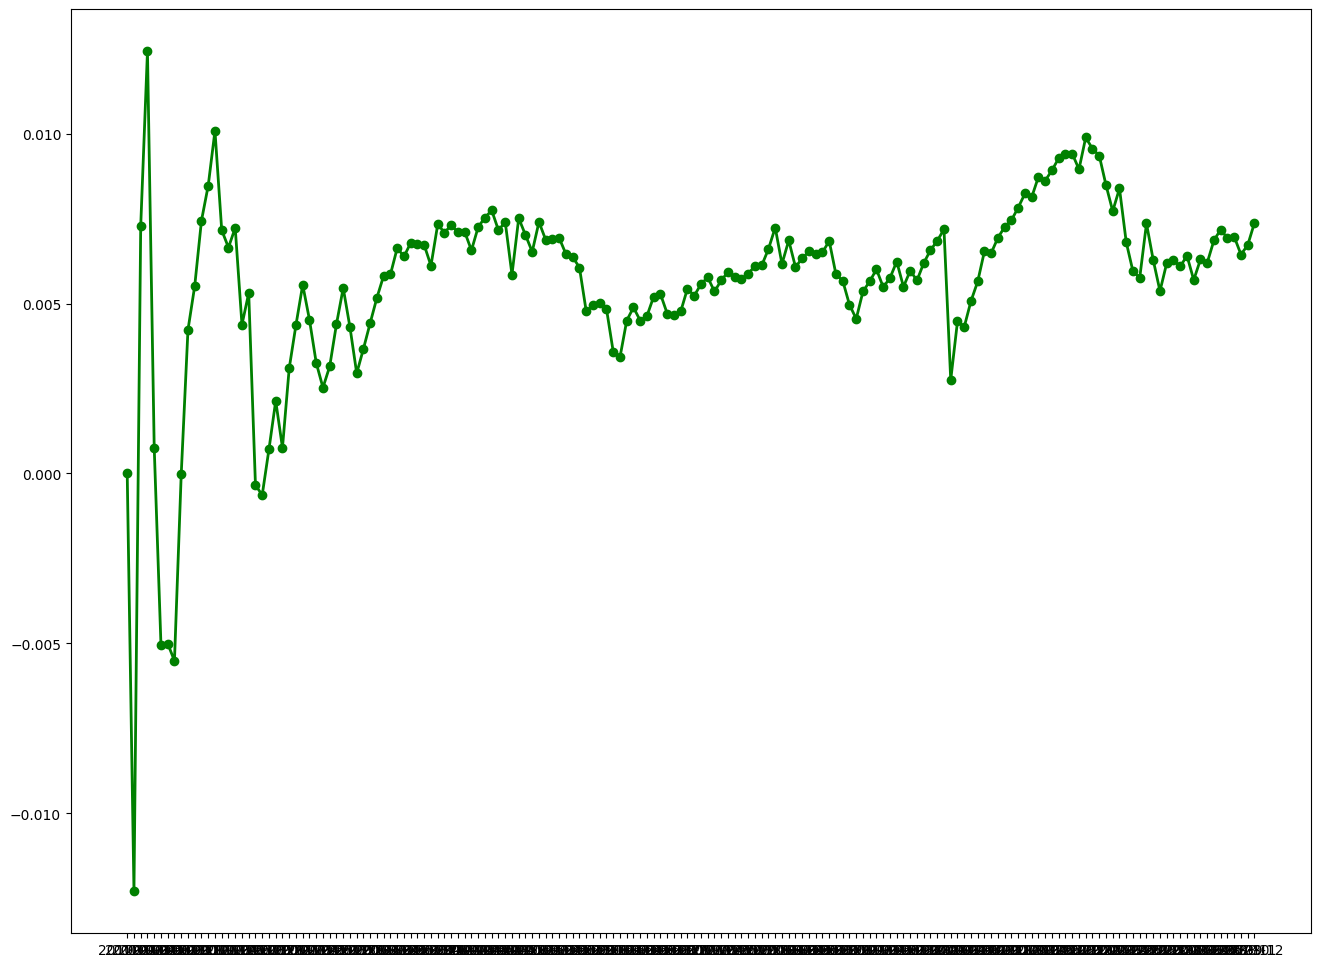

In [4]:
investing_day = 14
dataset = normalized_data.loc[normalized_data['CHOSEN_DAY'] == investing_day, ['TICKER', 'FIRST_OPEN_DATE', 'OPEN', 'BASE_OPEN', 'CHOSEN_DAY', 'MONTH']]
dataset.reset_index(drop=True, inplace=True)
dataset['OPEN'] = pd.to_numeric(dataset['OPEN'], errors='coerce')
dataset['INVESTED_THIS_DAY'] = 10000
dataset['TOTAL_INVESTED'] = dataset['INVESTED_THIS_DAY'].cumsum()

# Calculate the number of shares bought
dataset['SHARES_BOUGHT_THIS_DAY'] = dataset['INVESTED_THIS_DAY'] / dataset['OPEN']
dataset['HELD_SHARES'] = dataset['SHARES_BOUGHT_THIS_DAY'].cumsum()
dataset['TOTAL_VALUE'] = dataset['HELD_SHARES'] * dataset['OPEN']
dataset['PERF'] = dataset['TOTAL_VALUE'] / dataset['TOTAL_INVESTED'] - 1

# Calculate the cumulative occurrences for each day
dataset['DAY_OCCURRENCE'] = dataset.groupby('CHOSEN_DAY').cumcount() + 1
# Calculate the average performance per line based on cumulative occurrences
dataset['AVG_PERF'] = dataset['PERF'] / dataset['DAY_OCCURRENCE']

# Plot the results
plt.figure(figsize=(16, 12))
plt.plot(dataset['MONTH'], dataset['AVG_PERF'], marker='o', color='green', linestyle='-', linewidth=2)
plt.show()


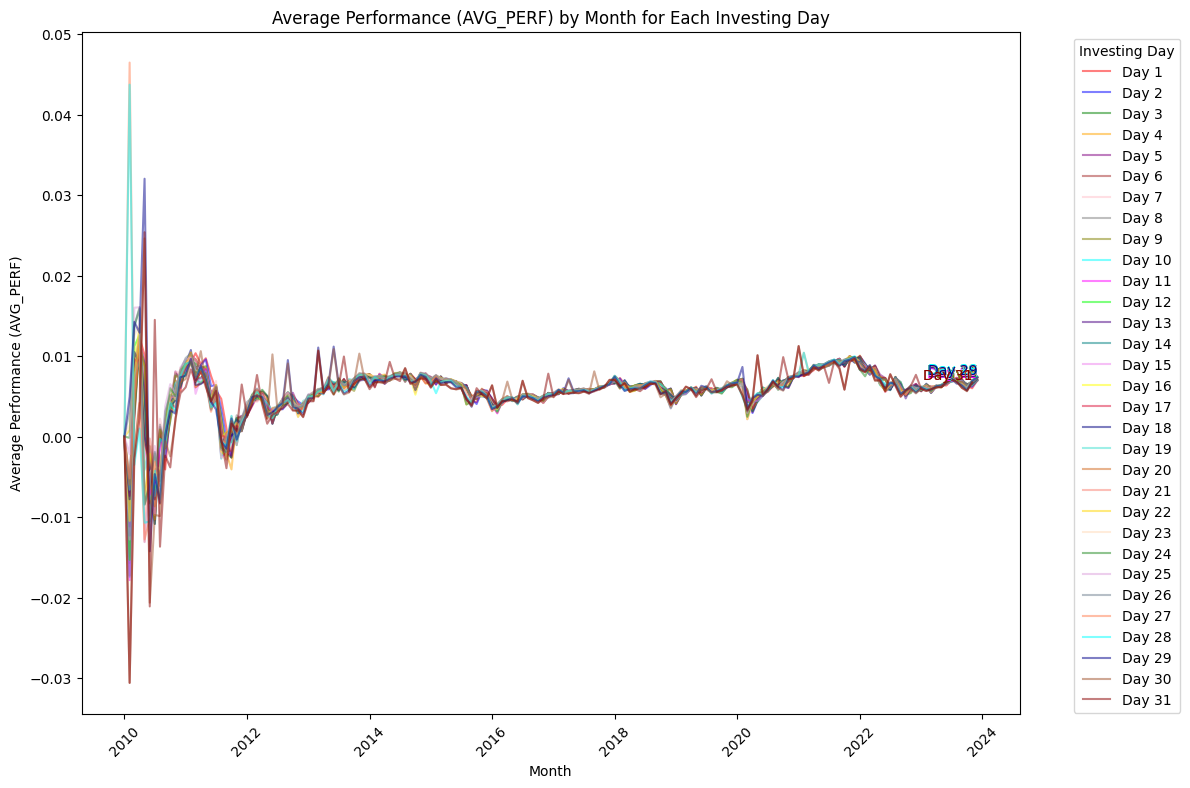

In [5]:
investing_days = list(range(1, 32))

colors = {
    1: 'red', 2: 'blue', 3: 'green', 4: 'orange', 5: 'purple', 6: 'brown',
    7: 'pink', 8: 'gray', 9: 'olive', 10: 'cyan', 11: 'magenta', 12: '#00FF00',
    13: 'indigo', 14: 'teal', 15: 'violet', 16: 'yellow', 17: 'crimson', 
    18: 'navy', 19: 'turquoise', 20: 'chocolate', 21: 'salmon', 22: 'gold', 
    23: '#FFDAB9', 24: 'forestgreen', 25: 'plum', 26: 'slategray', 27: 'coral', 
    28: 'aqua', 29: 'darkblue', 30: 'sienna', 31: 'darkred'
}

all_results = []

for investing_day in investing_days:
    dataset = normalized_data.loc[normalized_data['CHOSEN_DAY'] == investing_day, ['FIRST_OPEN_DATE', 'TICKER', 'OPEN', 'BASE_OPEN', 'CHOSEN_DAY', 'MONTH']]
    dataset.reset_index(drop=True, inplace=True)
    dataset['OPEN'] = pd.to_numeric(dataset['OPEN'], errors='coerce')
    
    dataset['INVESTED_THIS_DAY'] = 10000
    dataset['TOTAL_INVESTED'] = dataset['INVESTED_THIS_DAY'].cumsum()
    dataset['SHARES_BOUGHT_THIS_DAY'] = dataset['INVESTED_THIS_DAY'] / dataset['OPEN']
    dataset['HELD_SHARES'] = dataset['SHARES_BOUGHT_THIS_DAY'].cumsum()
    dataset['TOTAL_VALUE'] = dataset['HELD_SHARES'] * dataset['OPEN']
    dataset['PERF'] = dataset['TOTAL_VALUE'] / dataset['TOTAL_INVESTED'] - 1
    dataset['DAY_OCCURRENCE'] = dataset.groupby('CHOSEN_DAY').cumcount() + 1
    dataset['AVG_PERF'] = dataset['PERF'] / dataset['DAY_OCCURRENCE']
    
    all_results.append(dataset)

final_dataset = pd.concat(all_results)
final_dataset['MONTH'] = pd.to_datetime(final_dataset['MONTH'], format='%Y-%m')
final_dataset = final_dataset.sort_values(by='MONTH')

plt.figure(figsize=(12, 8))

for investing_day in investing_days:
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors[investing_day]
    plt.plot(day_data['MONTH'], day_data['AVG_PERF'], label=f'Day {investing_day}', color=color, alpha=0.5)
    plt.text(day_data['MONTH'].iloc[-1], day_data['AVG_PERF'].iloc[-1], f'Day {investing_day}', color=color, fontsize=10, verticalalignment='bottom', horizontalalignment='right')

plt.title('Average Performance (AVG_PERF) by Month for Each Investing Day')
plt.xlabel('Month')
plt.ylabel('Average Performance (AVG_PERF)')
plt.legend(title='Investing Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

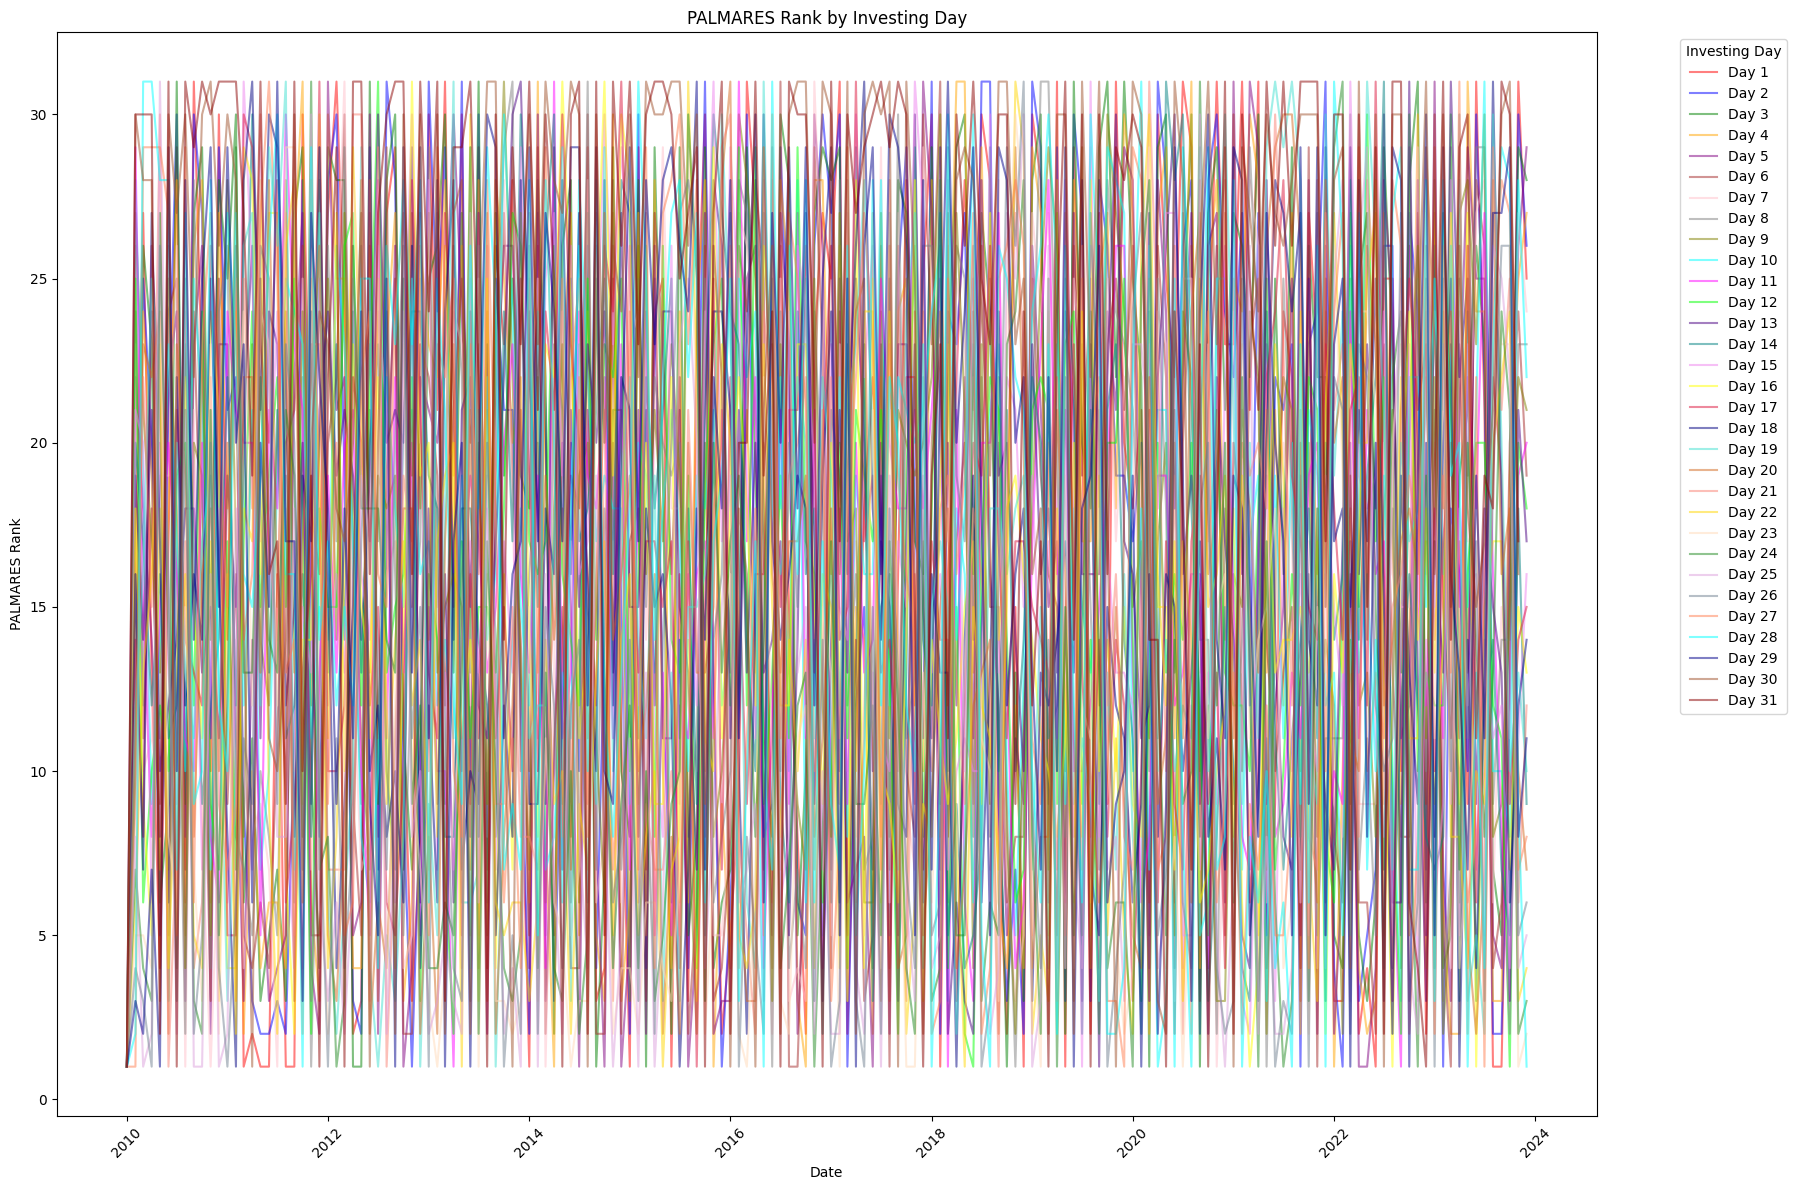

In [6]:
# Calculate the rank of each DAY by MONTH based on AVG_PERF
final_dataset['PALMARES'] = final_dataset.groupby('MONTH')['AVG_PERF'].rank(ascending=False, method='min')
final_dataset = final_dataset.sort_values(by=['CHOSEN_DAY', 'MONTH'])

plt.figure(figsize=(18, 12))

for investing_day in investing_days:
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors[investing_day]
    plt.plot(day_data['MONTH'], day_data['PALMARES'], label=f'Day {investing_day}', color=color, alpha=0.5)

plt.title('PALMARES Rank by Investing Day')
plt.xlabel('Date')
plt.ylabel('PALMARES Rank')
plt.legend(title='Investing Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


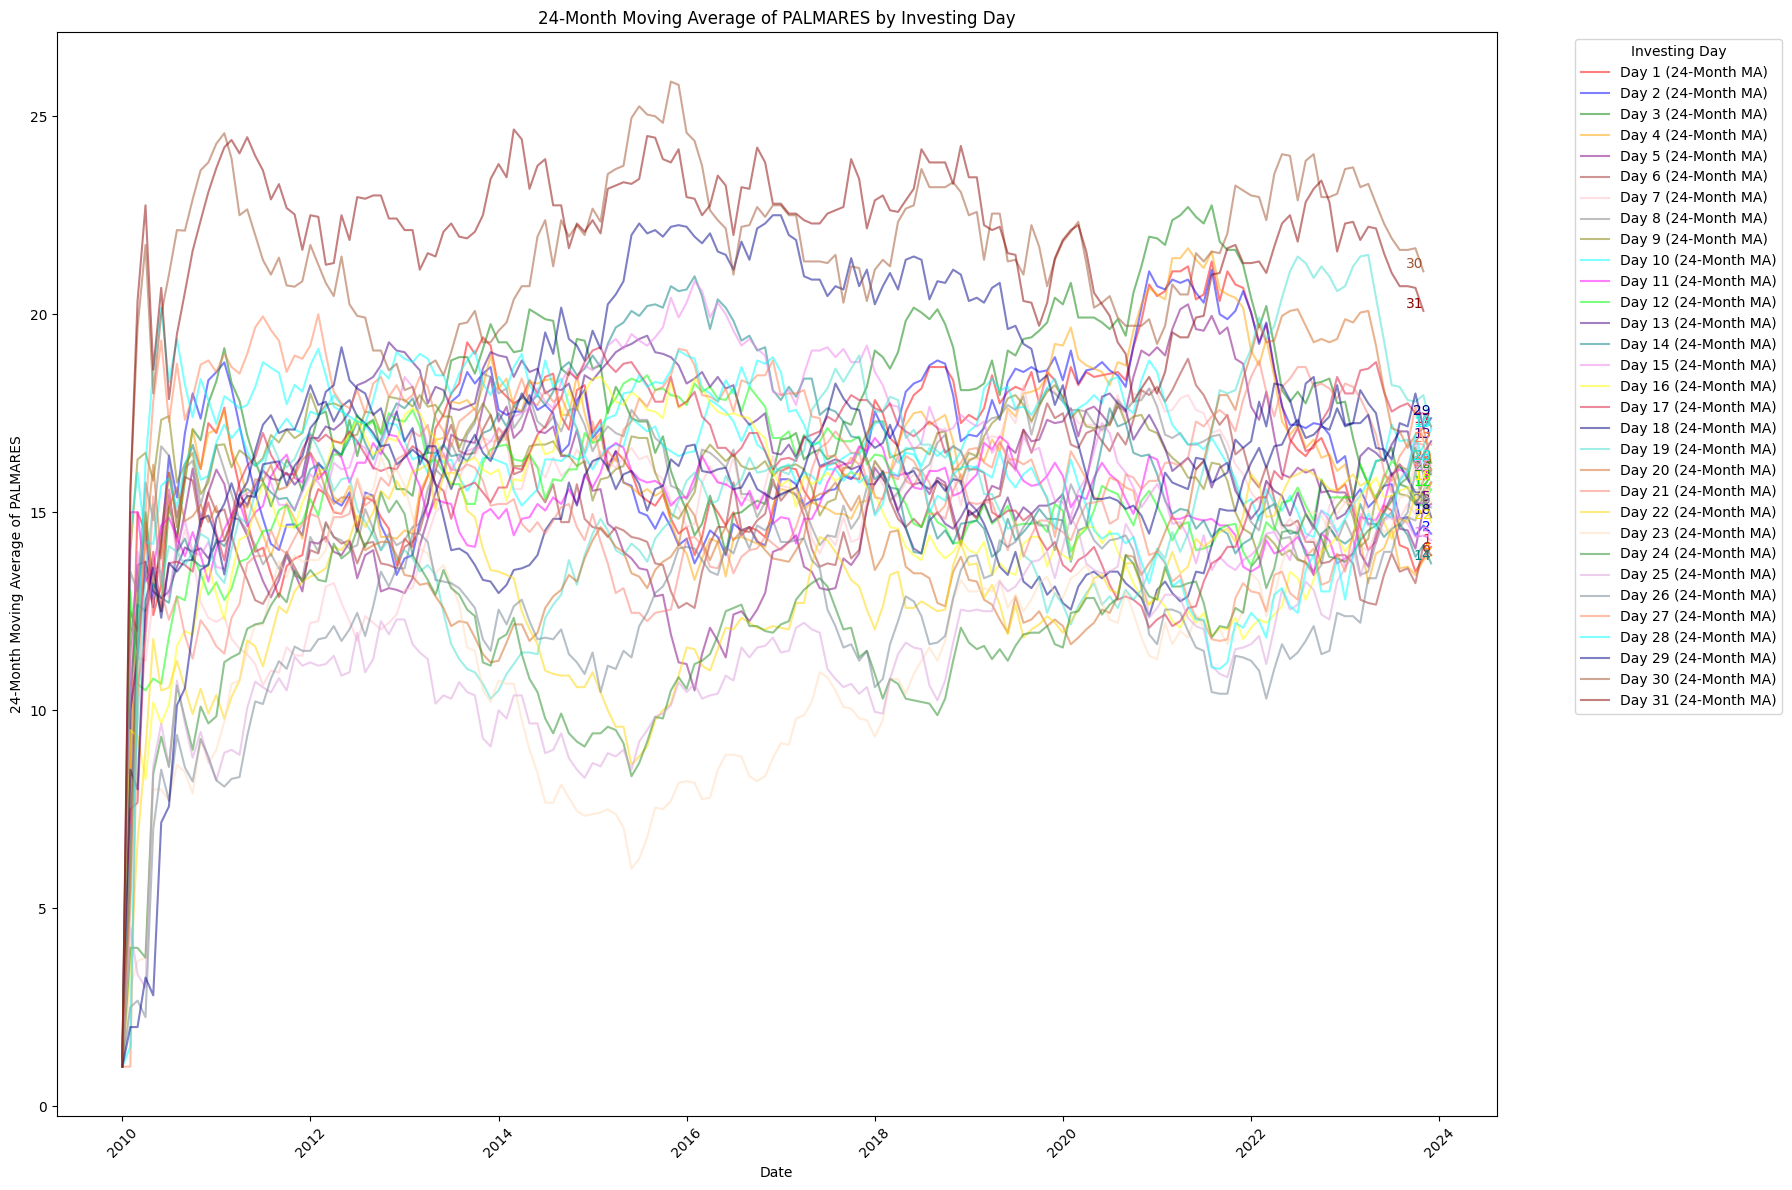

In [7]:
#We calculate the SMA24 for each day to try to smooth the overall vision:
final_dataset['MA24_PALMARES'] = final_dataset.groupby('CHOSEN_DAY')['PALMARES'].transform(lambda x: x.rolling(window=24, min_periods=1).mean())

plt.figure(figsize=(18, 12))

for investing_day in investing_days:
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors[investing_day]
    
    plt.plot(day_data['MONTH'], day_data['MA24_PALMARES'], label=f'Day {investing_day} (24-Month MA)', color=color, alpha=0.5)

    last_point = day_data.iloc[-1]
    plt.text(last_point['MONTH'], last_point['MA24_PALMARES'], str(last_point['CHOSEN_DAY']), color=color, 
             verticalalignment='bottom', horizontalalignment='right', fontsize=10)

plt.title('24-Month Moving Average of PALMARES by Investing Day')
plt.xlabel('Date')
plt.ylabel('24-Month Moving Average of PALMARES')
plt.legend(title='Investing Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


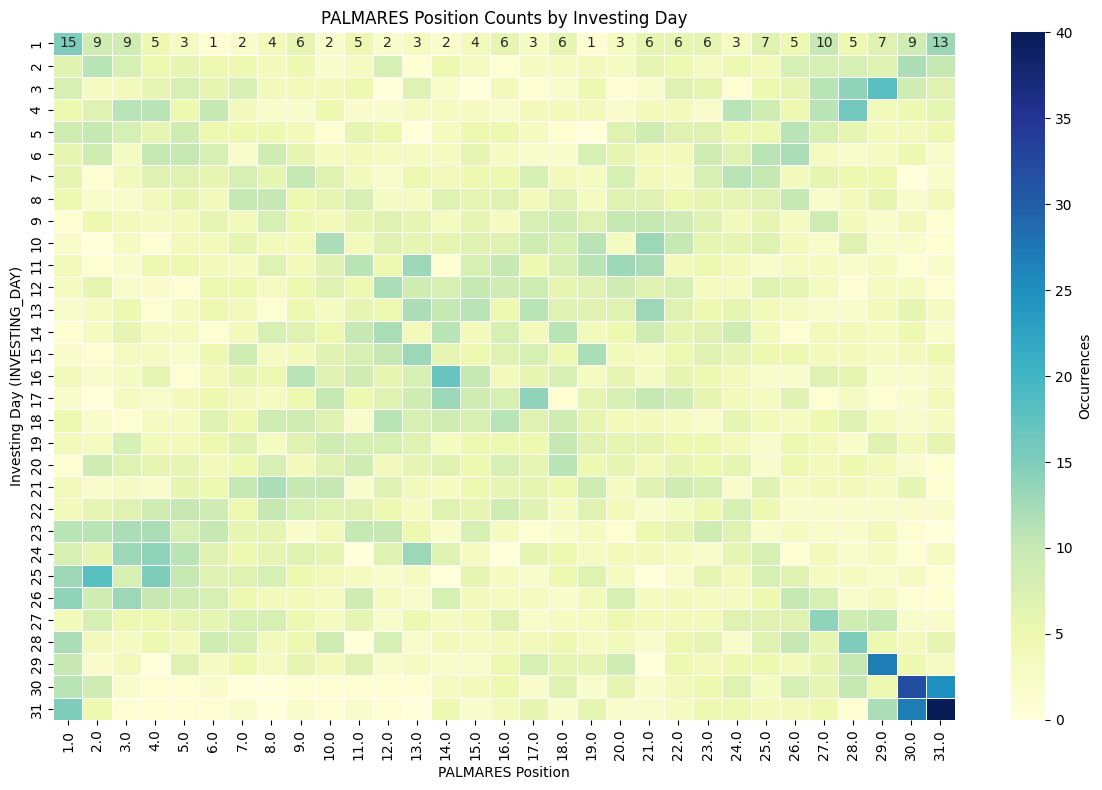

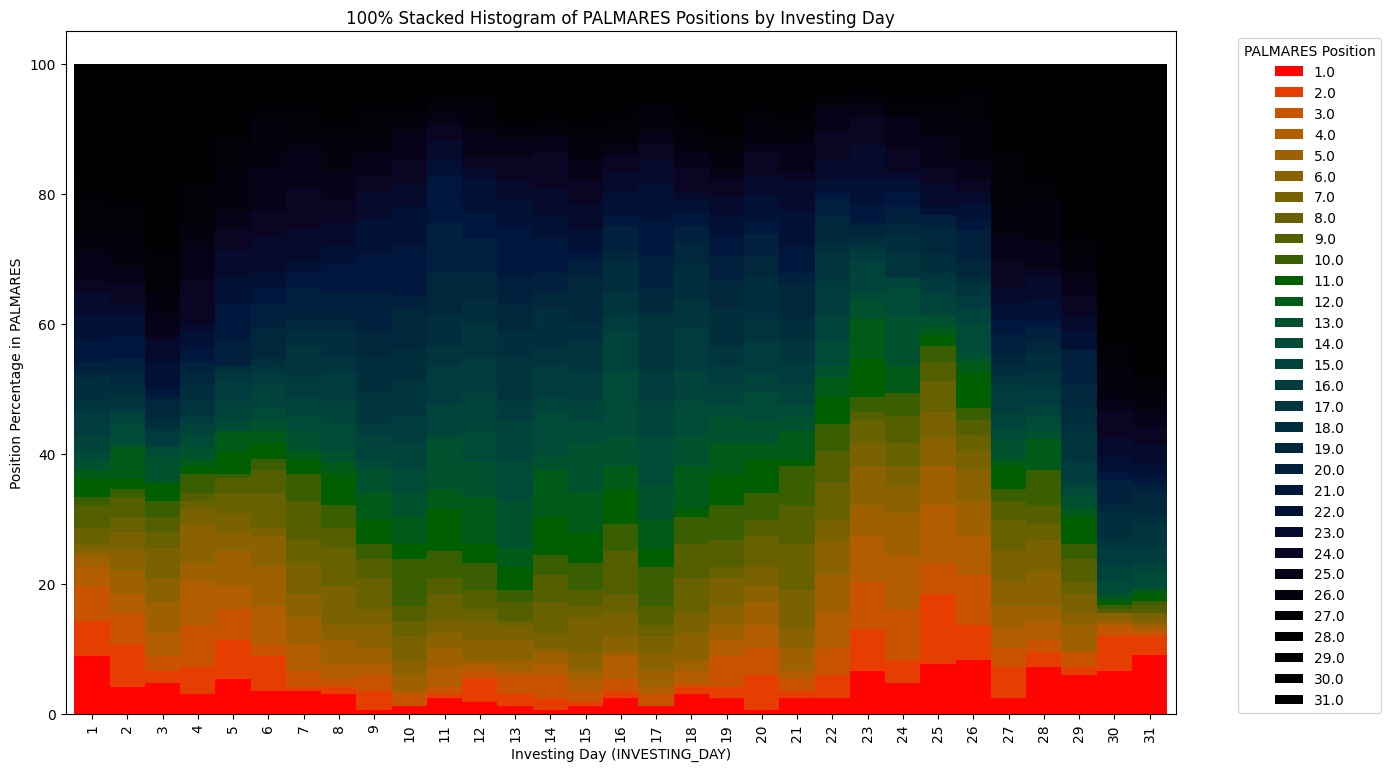

In [10]:
custom_colors = [
    '#ff0400', '#e63d00', '#c95400', '#b25d00', '#9e6000', '#8b6200', '#7a6200', '#676100', '#546000', 
    '#3a5f00', '#005f00', '#005a18', '#00522f', '#004b37', '#00433b', '#003c3d', '#00353d', '#002e3d', 
    '#00273c', '#00203d', '#00173d', '#011035', '#060a2c', '#090522', '#080218', '#06010f', '#040007', 
    '#020002', '#010000', '#000000', '#000000'
]

# 1. Count the occurrences of each INVESTING_DAY in each PALMARES position
position_counts = final_dataset.groupby(['CHOSEN_DAY', 'PALMARES']).size().unstack(fill_value=0)

# 2. Heatmap:
plt.figure(figsize=(12, 8))
sns.heatmap(position_counts, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Occurrences'}, linewidths=0.5)
plt.title('PALMARES Position Counts by Investing Day')
plt.xlabel('PALMARES Position')
plt.ylabel('Investing Day (INVESTING_DAY)')
plt.tight_layout()
plt.show()

# 3. Stacked barchart (100%)
position_percentage = position_counts.div(position_counts.sum(axis=1), axis=0) * 100
position_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), color=custom_colors[:31], width=1, edgecolor='none')

plt.title('100% Stacked Histogram of PALMARES Positions by Investing Day')
plt.xlabel('Investing Day (INVESTING_DAY)')
plt.ylabel('Position Percentage in PALMARES')
plt.legend(title='PALMARES Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


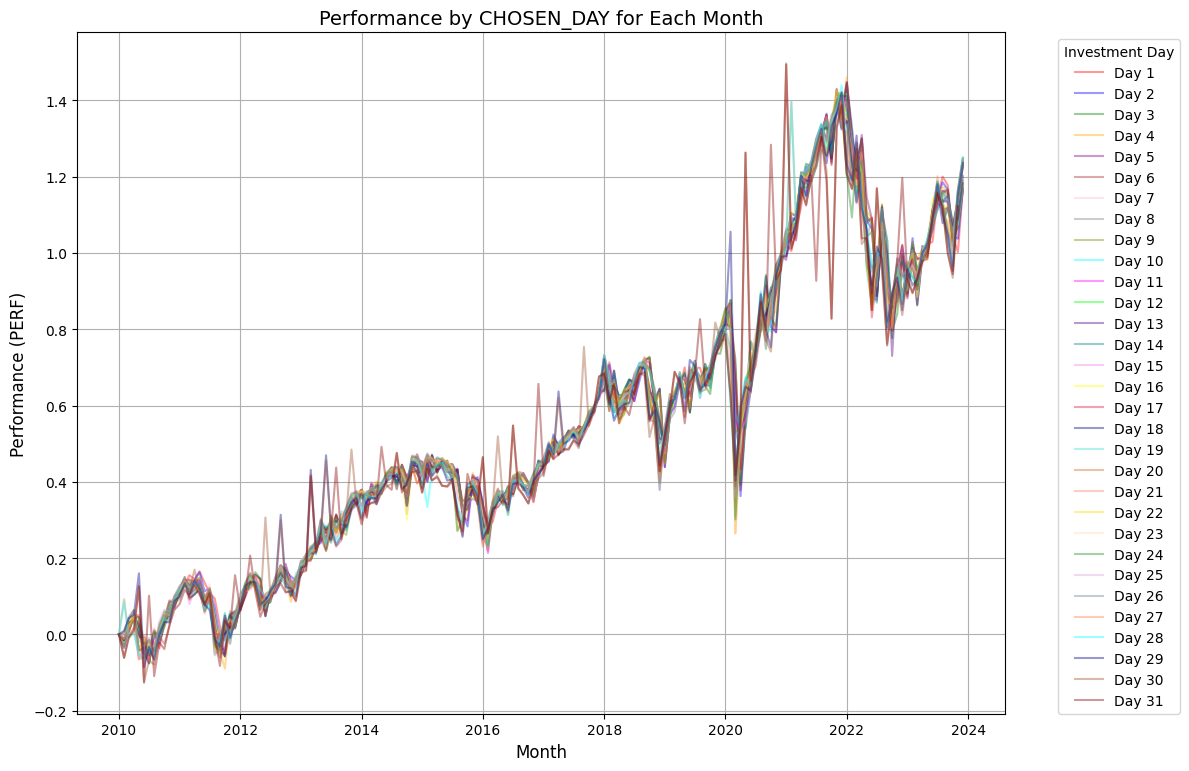

In [11]:
plt.figure(figsize=(12, 8))

# Plot performance for each investment day (CHOSEN_DAY) by month
for investing_day in range(1, 32):
    day_data = final_dataset[final_dataset['CHOSEN_DAY'] == investing_day]
    color = colors.get(investing_day, 'black')  # Default to 'black' if no color is defined
    plt.plot(day_data['MONTH'], day_data['PERF'], label=f'Day {investing_day}', color=color, alpha=0.4)

plt.title('Performance by CHOSEN_DAY for Each Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Performance (PERF)', fontsize=12)
plt.legend(title="Investment Day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
